<a href="https://colab.research.google.com/github/sunnatillo91/ai-datascience/blob/main/DL3_tabular_data_loan_decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data Science va Sun'iy Intellekt Praktikum

## 6-MODUL. Deep Learning

## lll-qism

### Tabular data

## Tabular data va Tabular model

### `Tabular data`: Tuzilishi jadval ko'rinishida bo'lgan ma'lumotlarni `tabular data` deb aytish mumkin.

### `Tabular model`: Bu jadvalning bir ustunini boshqa ustunidagi ma'lumotlarga tayanib o'qitilgan(trained) modelni tushinish mumkin.

Dataset: [Adult data set](https://archive.ics.uci.edu/ml/datasets/adult)

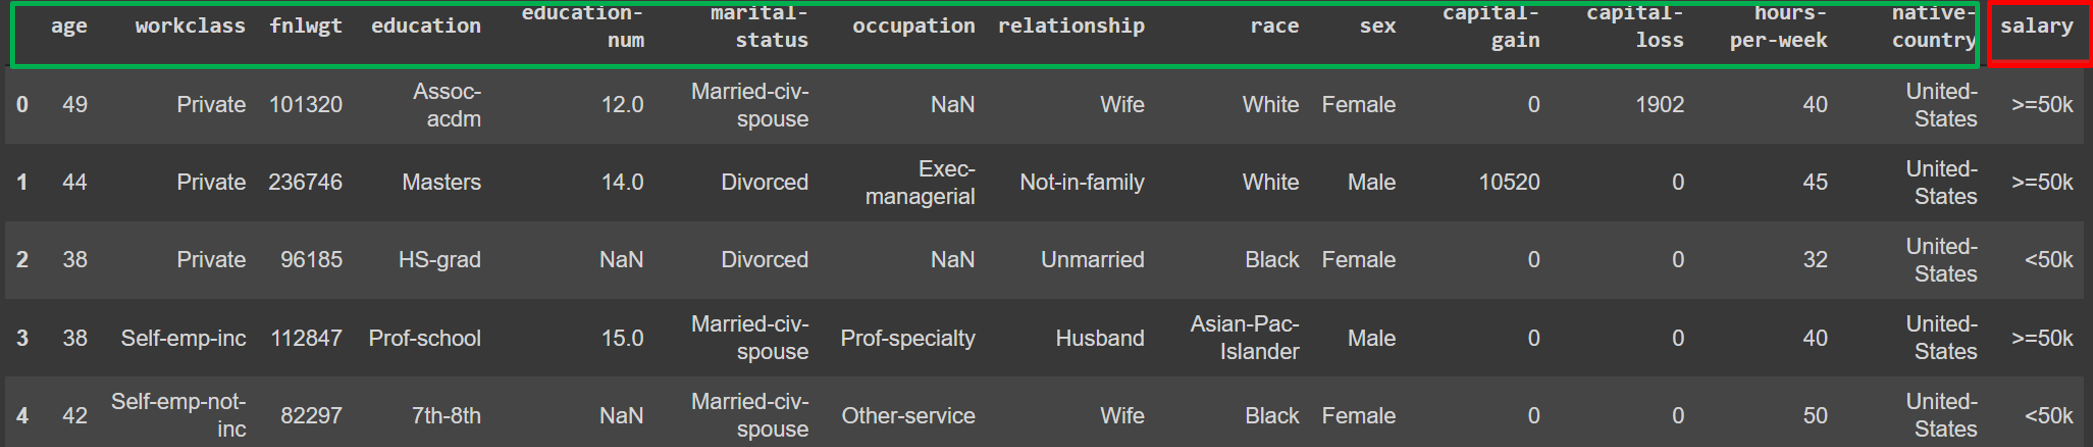

In [ ]:
from fastai.tabular.all import *

# dataset
path = untar_data(URLs.ADULT_SAMPLE)

# dataloaders
dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, bs=64, y_names='salary', skipinitialspace=False,
                                  cat_names=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex'],
                                  cont_names= ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'],
                                  procs = [Categorify, FillMissing, Normalize])

# o'qitish (train)
learn = tabular_learner(dls, metrics=accuracy)
# fit_one_cycle --> bu fine_tune dan farqli o'laroq, yangidan arxitektura tuzib o'qitadi
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.376687,0.363897,0.825706,00:16
1,0.324856,0.331941,0.845516,00:05
2,0.325193,0.330364,0.847205,00:06
3,0.315182,0.326436,0.849816,00:06


In [ ]:
import pandas as pd

# loading data set into dataframe
df = pd.read_csv(path/'adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [ ]:
# test
row, pred, probs = learn.predict(df.iloc[0])
pred.item(), probs

(1, tensor([0.1218, 0.8782]))

In [ ]:
row.show()

,workclass,education,marital-status,occupation,relationship,race,sex,education-num_na,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary
0,Private,Assoc-acdm,Married-civ-spouse,#na#,Wife,White,Female,False,49.0,101320.001638,12.0,0.00005,1902.000061,40.0,>=50k


Xulosa: Agar yillik maosh 50k dan kichik bo'lsa, unda `0` klass, va aksincha 50k ga teng yoki yuqori bo'ladigan bo'lsa `1` klass ekanligini bashorat qila oladigan model qurdik.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




## Tabular model yordamida `Loan decision`

### Ma'lumotlarga qarab kimlarga kredit ajratish haqida qaror qabul qilish.
### Dataset: Loan Default

In [ ]:
from fastai.tabular.all import *


# path
path = Path("/content/drive/MyDrive/Deep_learning/")

# dataloaders
dls = TabularDataLoaders.from_csv(path/'Loan_Default.csv', path=path, bs=64, y_names='Status',
                                  cat_names=['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'interest_only', 'lump_sum_payment', 'co-applicant_credit_type', 'submission_of_application', 'Region'],
                                  cont_names=['loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',  'LTV', 'dtir1'],
                                  procs=[Categorify, FillMissing, Normalize])

# train
learn = tabular_learner(dls, metrics=accuracy)

learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.003288,0.001761,0.759535,00:35
1,0.002881,0.000352,0.759535,00:29


In [ ]:
learn.show_results(max_n=64)

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,interest_only,lump_sum_payment,co-applicant_credit_type,submission_of_application,Region,rate_of_interest_na,Interest_rate_spread_na,Upfront_charges_na,term_na,property_value_na,income_na,LTV_na,dtir1_na,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1,Status,Status_pred
0,1.0,2.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.622876,-1.345042,0.071266,0.529284,-2.651632,-0.650347,0.010225,1.036770,0.224607,0.628783,0.0,0.020863
1,1.0,4.0,1.0,3.0,3.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,-1.166918,-0.085731,-0.086178,-0.163224,-0.599747,-1.060867,-0.462460,0.260090,0.519032,-1.853435,1.0,1.012035
2,1.0,4.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.084378,-0.321212,0.398041,1.165240,0.426196,-0.357119,-0.063922,-0.715077,0.609441,1.145911,0.0,0.018479
3,1.0,4.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.350856,-2.133391,-1.068523,0.021705,-2.651632,1.109022,-0.156605,1.148958,-1.216456,-0.715752,0.0,0.011628
4,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.954845,1.961927,2.170074,-0.023281,0.426196,0.141369,0.742424,-1.163826,0.609078,-1.026029,0.0,0.019862
5,1.0,2.0,2.0,3.0,3.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.350856,-1.345042,-1.281364,1.651934,0.426196,-0.327796,0.353154,1.563187,-0.071224,-1.543158,0.0,0.026476
6,1.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.731685,-0.577170,0.665382,-0.213657,-1.625690,-0.298473,-0.054653,0.708839,-0.642642,-2.370564,0.0,0.014193
7,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,-0.187643,-0.085731,-0.086178,-0.163224,0.426196,-0.269150,0.362422,-0.274957,0.043726,1.973317,1.0,1.003341
8,1.0,2.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.444482,0.190703,0.132045,0.661945,0.426196,0.639857,1.076084,-0.585630,0.324393,-1.129455,0.0,0.031306
9,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.949301,1.214532,2.894721,-0.798132,0.426196,-0.474410,-0.499533,-0.188659,-0.726979,-0.302049,0.0,0.027755
